# 1. Define your Diff function in python.

In [1]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np
random.seed(42)


# pick three vectors corresponding to letter of each group members name
u = (59, 94)
v = (62, 60)
w = (10, 40)


# define distance function 
def distance(vector_1, vector_2):
    ''' this function takes in two vectors and calculates and returns the distance between them'''
    
    return math.log(3 + 3 * (vector_1[0] - vector_2[0]) ** 2 + 1.5 * (vector_1[1] - vector_2[1]) ** 2)


# define the overall difference function
def difference(input_vector):
    ''' this function takes in a vector, compares it to the three fixed vectors for our group
    and returns the overall difference '''
    
    return distance(input_vector, u) + distance(input_vector, v) + distance(input_vector, w)


# 2. Compute Diff(x) for 20 random points. 
**What is the average value of Diff?**<br>
The average value was 24.91

**What is the lowest and highest value you found?**<br>
Lowest value was 21.63 and the highest was 27.21

**Is random search a good way to minimize this function?**<br>
No. Random search literally just gives you random points that you can then test the value of. There is no learning from the results of previously tried points and the time to get to a relatively good solution could take a very long time. There is no order and you are not "approaching" the minimal value, you are hoping that you happen to get a value that is close to the minimum by pure chance.

In [2]:
# randomly generate 20 points within the range
random_points = [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(20)]

# obtain the difference values for each of the 20 randomly generated points
diff_values = [difference(point) for point in random_points]

# obtain and print the average, highest and lowest value
average_diff = np.mean(diff_values)
max_diff = np.max(diff_values)
min_diff = np.min(diff_values)
print(f'Average difference: {average_diff}\nMaximum value: {max_diff}\nMinimum value: {min_diff}')


Average difference: 25.17733489812628
Maximum value: 28.168531397459258
Minimum value: 21.27284641900745


# 3. Set xzero=(50,50). Compute Diff(x)=Diff(50,50).

In [3]:
# create xzero and test with the difference function
xzero = (50, 50)
xzero_diff = difference(xzero)
print(xzero_diff)


22.93451831163977


# 4. Create a function to compute and print the gradient of Diff by using a small delta=0.001.

In [4]:
# create a function that calculates the gradient of the difference
def gradient_diff(input_vector, delta = 0.001):
    ''' this function takes in an input_vector and calculates its gradient in the 
    difference function '''
    
    # alter x_1 by delta then calculate the first partial derivative (gradient of x1)
    altered_x1_vector = (input_vector[0] + delta, input_vector[1])
    x1_gradient = (difference(altered_x1_vector) - difference(input_vector)) / delta
    
    # alter x_2 by delta then calculate the second partial derivative (gradient of x2)
    altered_x2_vector = (input_vector[0], input_vector[1]  + delta)
    x2_gradient = (difference(altered_x2_vector) - difference(input_vector)) / delta

    return (x1_gradient, x2_gradient)
    


# 5. Use this function to print the gradient at (0,0), (100,0), (0,100) and (100,100). 
**Based on these values, is it likely that the minimum of the function is inside this area? And the maximum?**
Based on the gradients, it is likely that the minimum is inside the area, since the gradients are pointing inwards from the corners.
Based on the gradients it is likely that there is no maximum in this region. At point (100,100) the gradient is positive in both directions, suggesting an increase in the function moving towards that point. Still, the gradients do not consistently point outwards suggesting that there is no maximum inside the specified region.

In [5]:
vectors = [(0,0), (100,0), (0,100), (100,100)]
delta = 0.001
for i in vectors:
    print(f"Gradient at {i}: {gradient_diff(i, delta)}")

Gradient at (0, 0): (-0.05909979456575343, -0.06692313176159814)
Gradient at (100, 0): (0.05708573236873349, -0.03839370529234998)
Gradient at (0, 100): (-0.070930388567092, 0.0418880083330464)
Gradient at (100, 100): (0.10026751570535453, 0.02740716165305912)


# 6. Define xzero=(50,50) and stepsize=1.0. 
**Make a function to compute xnext by taking e a small step into the opposite direction of the gradient, so that diff decreases. E.g. if the gradient is (0.4,0.6), do xnext=(oldx1-0.4*stepsize,oldx2-0.6*stepsize**

In [9]:
xzero = (50,50)
stepsize = 1.0
delta = 0.001
def xnext(input_vector, delta, stepsize):
    """
    xnext Function:
    Adjusts the input vector by taking steps in the opposite direction of the gradient, aiming to minimize the function value.
    """
    gradient = gradient_diff(input_vector, delta)
    x1next = input_vector[0] - gradient[0] * stepsize
    x2next = input_vector[1] - gradient[1] * stepsize
    return (x1next, x2next)
xnext(xzero, delta, stepsize)

(50.09176650724996, 50.08712874604555)

# 7. Repeat this multiple times (make a function to do this automatically) and print x and Diff(x) at each step. 
**You may need to adjust stepsize if you overshoot or are not moving at all. Try to reach a local minimum.**

In [23]:
# create gradient descent function to find a local minimum
def g_descent(input_vector, stepsize, delta, thres=10**-20):
    """
    Gradient Descent Function:
    
    This function performs gradient descent optimization to find the local minimum of a given function `Diff(x)`.
    It iteratively adjusts the input vector by taking steps in the opposite direction of the gradient, aiming to minimize `Diff(x)`.
    """
    
    step_diff = float('inf')
    current = input_vector 
    step = 0
    
    # keep updating steps until there is little difference in updates
    while step_diff > thres:
        
        # get updated step
        x_next = xnext(current, delta, stepsize)
        step +=1
        
        # calculate the difference of this new step
        next_diff = difference(x_next)
        print(f"Step {step}: x = {x_next}, Diff(x) = {next_diff}")
        
        # check the size of difference between previous and current step
        step_diff = difference(current) - next_diff
        
        # update the current step
        current = x_next

    
#testing
xzero = (50,50)
stepsize = 0.6
delta = 0.001
g_descent(xzero, stepsize, delta)
#at step 136 local minimum was reached.


Step 1: x = (50.055059904349974, 50.05227724762733), Diff(x) = 22.924886120740425
Step 2: x = (50.110496999364784, 50.10472604355556), Diff(x) = 22.915154038110227
Step 3: x = (50.16631618492866, 50.15734908402152), Diff(x) = 22.905320092616716
Step 4: x = (50.22252248218564, 50.21014912940913), Diff(x) = 22.895382255128283
Step 5: x = (50.27912103781347, 50.26312900654517), Diff(x) = 22.885338436172894
Step 6: x = (50.336117128472324, 50.31629161110587), Diff(x) = 22.87518648347882
Step 7: x = (50.393516165500785, 50.36963991014929), Diff(x) = 22.86492417938325
Step 8: x = (50.4513236997866, 50.423176944750026), Diff(x) = 22.854549238111588
Step 9: x = (50.50954542688473, 50.476905832759655), Diff(x) = 22.844059302911766
Step 10: x = (50.568187192374126, 50.530829771733465), Diff(x) = 22.83345194303347
Step 11: x = (50.62725499747032, 50.58495204197229), Diff(x) = 22.822724650547514
Step 12: x = (50.68675500490869, 50.63927600972207), Diff(x) = 22.811874836991734
Step 13: x = (50.7466

# 8. Repeat step 7 with starting points (0,0) and (100,100). 
**Do you always end up at the same point?**
No. It seems that there are at least three local minima. Depending on the function landscape there can be a number of local minima or maxima. Gradient Descent will follow the steepest downhill path which is the direction opposite to the gradient. Therefore, gradient descent is local.

In [26]:
stepsize1 = 1
stepsize2 = 1
delta = 0.001
point1 = (0,0)
point2 = (100,100)
g_descent(point1, stepsize1, delta)
g_descent(point2, stepsize2, delta)

Step 1: x = (0.05909979456575343, 0.06692313176159814), Diff(x) = 27.704509628986436
Step 2: x = (0.11819652140943049, 0.1339833750328978), Diff(x) = 27.696515592514604
Step 3: x = (0.17728984055054298, 0.2011813051012723), Diff(x) = 27.68850345436532
Step 4: x = (0.2363794080366688, 0.2685175006753582), Diff(x) = 27.680473139194646
Step 5: x = (0.29546487586529224, 0.33599254390281885), Diff(x) = 27.6724245711832
Step 6: x = (0.35454589196248776, 0.4036070203987663), Diff(x) = 27.66435767402971
Step 7: x = (0.4136221001260765, 0.47136151926707726), Diff(x) = 27.65627237094708
Step 8: x = (0.47269313997588824, 0.5392566331465787), Diff(x) = 27.648168584656247
Step 9: x = (0.5317586469040236, 0.6072929582074948), Diff(x) = 27.640046237383324
Step 10: x = (0.590818252025116, 0.6754710942047382), Diff(x) = 27.631905250852775
Step 11: x = (0.6498715821372514, 0.7437916444956727), Diff(x) = 27.623745546282272
Step 12: x = (0.7089182596580201, 0.812255216079194), Diff(x) = 27.615567044377467

# 9. Make the nicest possible chart using mathplotlib that shows what the Diff function looks like.

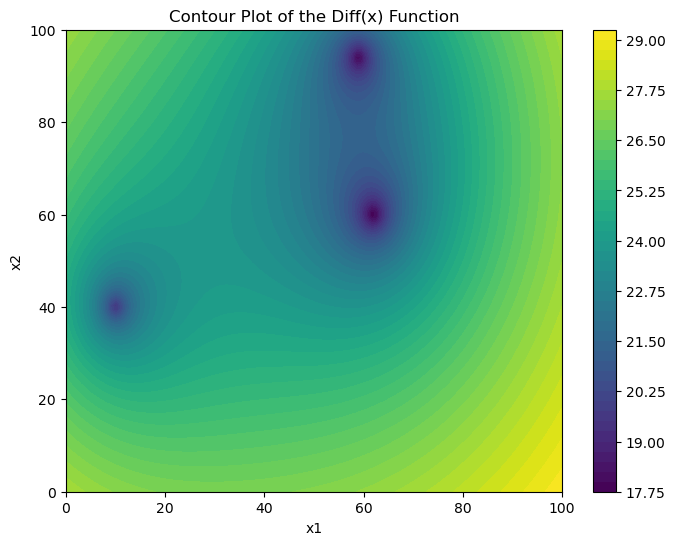

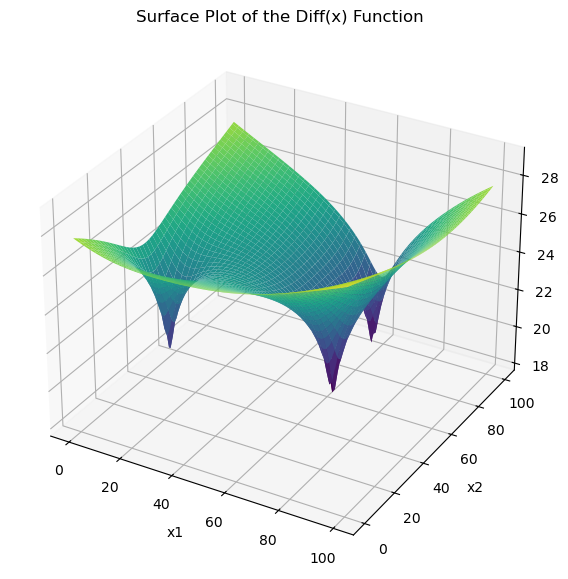

In [38]:
''' creating a 2d representation of what the Diff function looks like '''

# define a function to compute Diff(x) over a grid of points
def compute_diff_grid(x_range, y_range):
    ''' this function computes then returns the Diff function values over a grid of x1 and x2 values '''

    # create 100 x 100 grid values for each the x and y range + the grid for diff values
    x1_vals, x2_vals = np.meshgrid(x_range, y_range)
    diff_vals = np.zeros_like(x1_vals)
    
    # loop through every point in the grid
    for i in range(len(x_range)):
        for j in range(len(y_range)):
            
            # calculate the diff at each point (indexing reversed due to row-first indexing)
            diff_vals[j, i] = difference((x1_vals[j, i], x2_vals[j, i]))
    
    return x1_vals, x2_vals, diff_vals


# define range of x1 and x2 values for plot
x_range = np.linspace(0, 100, 100)
y_range = np.linspace(0, 100, 100)

# compute Diff function over the grid
x1_vals, x2_vals, diff_vals = compute_diff_grid(x_range, y_range)

# create contour plot of Diff function
plt.figure(figsize=(8, 6))
contour = plt.contourf(x1_vals, x2_vals, diff_vals, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.title("Contour Plot of the Diff(x) Function")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


''' Creating an additional 3d representation of what the Diff function looks like '''
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1_vals, x2_vals, diff_vals, cmap='viridis')

ax.set_title("Surface Plot of the Diff(x) Function")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("Diff(x)")

plt.show()

# 10. Show the gradient field as well in a chart. 
**Use a new plot or add the gradient to the original plot.**

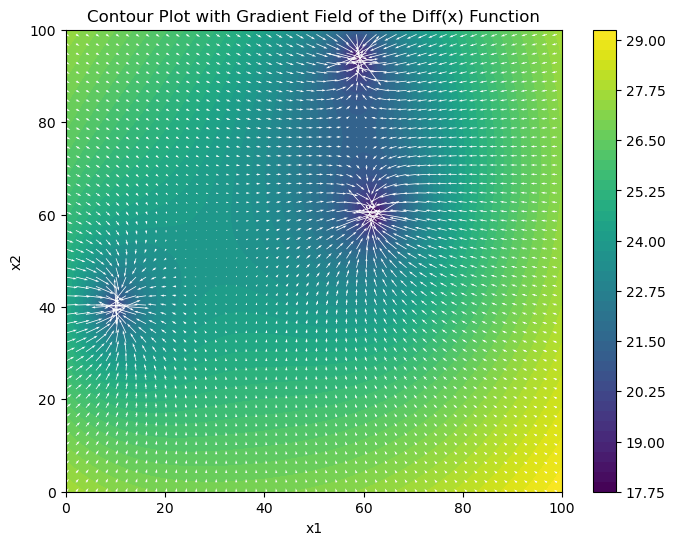

In [88]:
# create a gradient function to compute the gradient at every point in the grid
def compute_gradients(x1_vals, x2_vals, delta=0.001):
    ''' this function takes in a grid of x1 and x2 values and calculates the gradient of each
    element at each point in the grid '''
    
    # create empty gradient grids
    grad_x1 = np.zeros_like(x1_vals)
    grad_x2 = np.zeros_like(x2_vals)
    
    # loop through each point in each grid
    for i in range(x1_vals.shape[0]):
        for j in range(x1_vals.shape[1]):
            
            # obtain the gradient of each element at this point
            gradients = gradient_diff((x1_vals[i, j], x2_vals[i, j]), delta)
            grad_x1[i, j] = gradients[0] 
            grad_x2[i, j] = gradients[1] 
    
    return grad_x1, grad_x2

# compute gradient field
grad_x1, grad_x2 = compute_gradients(x1_vals, x2_vals)

# create 2D contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(x1_vals, x2_vals, diff_vals, levels=50, cmap='viridis')
plt.colorbar(contour)

# add gradient field using quiver
step = 2
plt.quiver(x1_vals[::step, ::step], x2_vals[::step, ::step], -grad_x1[::step, ::step], -grad_x2[::step, ::step], 
           color='white', scale=10, width=0.0015)


# set plot labels
plt.title("Contour Plot with Gradient Field of the Diff(x) Function")
plt.xlabel("x1")
plt.ylabel("x2")

plt.show()